<h1 style="text-align: center; margin-left: 2%">Clustering Assignment</h1>
<br/>
<div style="text-align: center">
        By:<br/>
        Peter Sharun Woodman M
</div>

### Problem Statement:
- #### To aid the NGO in using the funds strategically and effectively on the countries which are in direst need.
- #### For this, as a data analyst, we need to perform the following activities:<br/>
    - To categorise the countries using some socio-economic and health factors. 
    - To suggest top 5 countries to NGO which needs the most focus.<br/>

### Understanding the dataset

The dataset contains socio economic and health factors for a list of countries.

**Features**

|Feature|Feature_Type|Description|
|-----|-----|-----|
|country|Categorical|Name of the country|
|child_mort|Numerical|Death of children under 5 years of age per 1000 live births|
|exports|Numerical|Death of children under 5 years of age per 1000 live births|
|health|Numerical|Total health spending per capita. Given as %age of GDP per capita|
|imports|Numerical|Imports of goods and services per capita. Given as %age of the GDP per capita|
|Income|Numerical|Net income per person|
|Inflation|Numerical|The measurement of the annual growth rate of the Total GDP|
|life_expec|Numerical|The average number of years a new born child would live if the current mortality patterns are to remain the same|
|total_fer|Numerical|The number of children that would be born to each woman if the current age-fertility rates remain the same.|
|gdpp|Numerical|The GDP per capita. Calculated as the Total GDP divided by the total population.|

### Steps:
- #### Step 1: Import the required libraries
- #### Step 2: Reading and Understanding the Data
- #### Step 3: Data Cleaning
- #### Step 4: Visualising the Data
- #### Step 5: Rescaling the features
- #### Step 6: Modelling
- #### Step 7: Final Words and Recommendations

### Step 1: Import the required libraries

In [1]:
# Surpress warnings
import warnings
warnings.filterwarnings('ignore')

# For numerical calculations and analysis
import numpy as np
import pandas as pd

# Configuration of DataFrame
pd.set_option('display.max_columns', 500)

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For scaling
import sklearn
from sklearn.preprocessing import StandardScaler

# For hopkins statistics
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

# For finding optimal number of clusters
from sklearn.metrics import silhouette_score

# For K-means clustering
from sklearn.cluster import KMeans

# For hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

### Step 2: Reading and Understanding the Data
- #### 2.1: Read the country data from excel
- #### 2.2: Inspect the dataframe

-  #### 2.1: Read the country data from excel

    Note: Please keep the files to read in the same directory as the current python file

In [2]:
# Importing and reading the country data.
country_df = pd.read_csv("Country-data.csv")

# Displaying the dataframe
print("Dataframe after importing and reading from the Country-data database :")
country_df.head()

Dataframe after importing and reading from the Country-data database :


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


-  #### 2.2: Inspect the dataframe

In [3]:
# Viewing the first 5 records of the dataframe
print("First 5 records of the dataframe:")
display(country_df.head(5))

# Viewing the last 5 records of the dataframe
print("Last 5 records of the dataframe:")
display(country_df.tail(5))

First 5 records of the dataframe:


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


Last 5 records of the dataframe:


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310
166,Zambia,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1460


In [4]:
# Viewing the shape of the dataframe
print("Shape of the dataframe:{0}".format(country_df.shape))
print("\t - Number of rows in the dataframe:{0}".format(country_df.shape[0]))
print("\t - Number of columns in the dataframe:{0}".format(country_df.shape[1]))

print('______________________________________________________________________________\n')

# Columns in DataFrame
print("Columns in DataFrame : \n{0}".format(country_df.columns))

print('______________________________________________________________________________\n')

# Viewing the info about the dataframe
print("Info about dataframe:")
print(country_df.info())

print('______________________________________________________________________________\n')

# Viewing the general statistical data about the dataframe
print("Describing the dataframe:")
display(country_df.describe())

Shape of the dataframe:(167, 10)
	 - Number of rows in the dataframe:167
	 - Number of columns in the dataframe:10
______________________________________________________________________________

Columns in DataFrame : 
Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')
______________________________________________________________________________

Info about dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_f

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


### Step 3: Data Cleaning
- #### 3.1: Inspect the null values
- #### 3.2: Drop less significant columns
- #### 3.3: Drop duplicate values (if any)
- #### 3.4: Data Conversion and Calculated Variables
- #### 3.5: Outlier detection

- #### 3.1: Inspect the null values

In [5]:
print("Column-wise null count and null percentage:")

# Calculating column-wise null count
country_null_count_series = country_df.isnull().sum()

# Calculating column-wise null percentage
country_null_perc_series = round(((country_null_count_series / country_df.shape[0]) * 100))

# Combining column-wise null count and null percentages
country_combined_col_null_df = pd.concat([country_null_count_series, country_null_perc_series], axis=1)

# Changing column names
country_combined_col_null_df.columns = ['Null Count', 'Null Percentage']

# Printing the combined DataFrame
display(country_combined_col_null_df)

print("As null percentage of all columns are 0, we are not going to drop columns because of missing data.")

Column-wise null count and null percentage:


,Null Count,Null Percentage
country,0,0.0
child_mort,0,0.0
exports,0,0.0
health,0,0.0
imports,0,0.0
income,0,0.0
inflation,0,0.0
life_expec,0,0.0
total_fer,0,0.0
gdpp,0,0.0


As null percentage of all columns are 0, we are not going to drop columns because of missing data.


- #### 3.2: Drop less significant columns

In [6]:
print("There are only 10 columns and all these columns are significant.")
print("So, we are not going to drop columns because of significance level.")

There are only 10 columns and all these columns are significant.
So, we are not going to drop columns because of significance level.


- #### 3.3: Drop duplicate values (if any)

In [7]:
# Calculating number of rows before dropping
print("Number of rows before dropping : {0}\n".format(country_df.shape[0]))

# Dropping duplicates
print('Dropping duplicates... \n')
country_df.drop_duplicates(keep = 'first', inplace=True)

# Calculating number of rows after dropping
print("Number of rows after dropping : {0}".format(country_df.shape[0]))

print('\nWe can observe that there are no duplicate values.')

Number of rows before dropping : 167

Dropping duplicates... 

Number of rows after dropping : 167

We can observe that there are no duplicate values.


- #### 3.4: Data Conversion and Calculated Variables

In [8]:
print("Data Conversion:")
print("- The values of export, import and health are given as percentages of gdpp.")
print("- Therefore, we need to convert these percentages to their actual values.")
print("- Dataframe before converting:")
display(country_df[['country', 'imports', 'exports', 'health', 'gdpp']].head(5))

print('\n______________________________________________________________________________\n')

print("Converting percentage values to actual values...")
def convert_perc_to_value(col, gdpp):
    return (col*gdpp/100)
country_df[['imports', 'exports', 'health']] = country_df[['imports', 'exports', 'health']].apply(lambda x : convert_perc_to_value(x, country_df['gdpp']))

print('\n______________________________________________________________________________\n')

print("Dataframe after converting:")
display(country_df[['country', 'imports', 'exports', 'health', 'gdpp']].head(5))

Data Conversion:
- The values of export, import and health are given as percentages of gdpp.
- Therefore, we need to convert these percentages to their actual values.
- Dataframe before converting:


,country,imports,exports,health,gdpp
0,Afghanistan,44.9,10.0,7.58,553
1,Albania,48.6,28.0,6.55,4090
2,Algeria,31.4,38.4,4.17,4460
3,Angola,42.9,62.3,2.85,3530
4,Antigua and Barbuda,58.9,45.5,6.03,12200



______________________________________________________________________________

Converting percentage values to actual values...

______________________________________________________________________________

Dataframe after converting:


,country,imports,exports,health,gdpp
0,Afghanistan,248.297,55.30,41.9174,553
1,Albania,1987.740,1145.20,267.8950,4090
2,Algeria,1400.440,1712.64,185.9820,4460
3,Angola,1514.370,2199.19,100.6050,3530
4,Antigua and Barbuda,7185.800,5551.00,735.6600,12200


- #### 3.5: Outlier detection

In [9]:
# Specifying the columns for outlier detection
numeric_cols = country_df.select_dtypes(include=['number']).columns


# Describing the columns for outlier detection
print("Describing the columns for outlier detection:")
display(country_df[numeric_cols].describe().transpose())

Describing the columns for outlier detection:


,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.600000,8.2500,19.300,62.10,208.00
exports,167.0,7420.618847,17973.885795,1.076920,447.1400,1777.440,7278.00,183750.00
health,167.0,1056.733204,1801.408906,12.821200,78.5355,321.886,976.94,8663.60
imports,167.0,6588.352108,14710.810418,0.651092,640.2150,2045.580,7719.60,149100.00
income,167.0,17144.688623,19278.067698,609.000000,3355.0000,9960.000,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.210000,1.8100,5.390,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.100000,65.3000,73.100,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.150000,1.7950,2.410,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.000000,1330.0000,4660.000,14050.00,105000.00


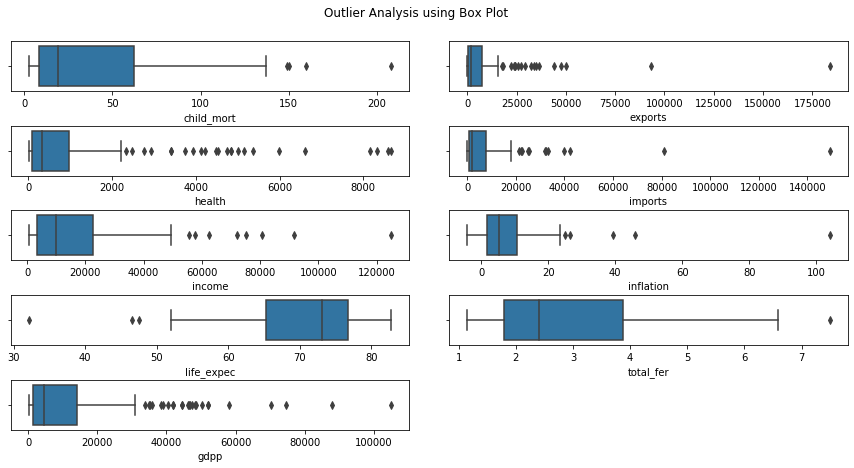

In [10]:
# Using boxplot to check for outliers

# Function to boxplot
def plot_boxplot(dataframe, cols_to_plot):
    
    # Calculating the number of rows for subplot
    col_len = len(cols_to_plot)
    subplot_rows = (col_len//2) + (col_len%2)
    
    # Setting the parameters for figure
    plt.figure(figsize=(15, 6))
    plt.suptitle('Outlier Analysis using Box Plot')
    plt.subplots_adjust(top = 0.90, bottom=0.0, hspace=0.7, wspace=0.1)
    
    # Looping over columns for plotting    
    for i in range(0, len(cols_to_plot)):
        # Plotting boxplot        
        plt.subplot(subplot_rows,2,i+1)
        sns.boxplot(x=cols_to_plot[i], data=dataframe)
        # Setting labels
        plt.xlabel(cols_to_plot[i])
    plt.show()

# Function for box plotting
plot_boxplot(country_df, numeric_cols)

In [11]:
# Observations from boxplot

print('Observations from boxplot:')
print('- child_mort:')
print('\t- There are 3 outliers which are almost above 150')
print('- exports:')
print('\t- There are many outliers in the higher range.')
print('- health')
print('\t- The health parameter has many outliers in the upper range.')
print('- imports')
print('\t- There are few outliers for imports in the higher range')
print('- income')
print('\t- There are few outliers (around 8) which are on the higher side.')
print('- inflation')
print('\t- It has 4 normal outliers and 1 extreme outlier which is way far from the mean')
print('- life_expec')
print('\t- It has three outliers which lie in the lower range.')
print('- total_fer')
print('\t- There is only one outlier in the upper range.')
print('- gdpp')
print('\t- There are many normal outliers and extreme outliers')

Observations from boxplot:
- child_mort:
	- There are 3 outliers which are almost above 150
- exports:
	- There are many outliers in the higher range.
- health
	- The health parameter has many outliers in the upper range.
- imports
	- There are few outliers for imports in the higher range
- income
	- There are few outliers (around 8) which are on the higher side.
- inflation
	- It has 4 normal outliers and 1 extreme outlier which is way far from the mean
- life_expec
	- It has three outliers which lie in the lower range.
- total_fer
	- There is only one outlier in the upper range.
- gdpp
	- There are many normal outliers and extreme outliers


Handling outliers:
- We are going to handle the outliers by capping them.
- As our main objective is to find the countries which are in the direst need of aid,
	 it is recommended not to cap the lower range, so we are going to cap only the upper range.
- We will be performing capping for higher range based on the number of outliers.
- The columns for which capping will be done are:
Index(['exports', 'health', 'imports', 'income', 'total_fer', 'gdpp'], dtype='object')

______________________________________________________________________________

Capping outliers...

______________________________________________________________________________

Analysing the capped columns after outlier treatment


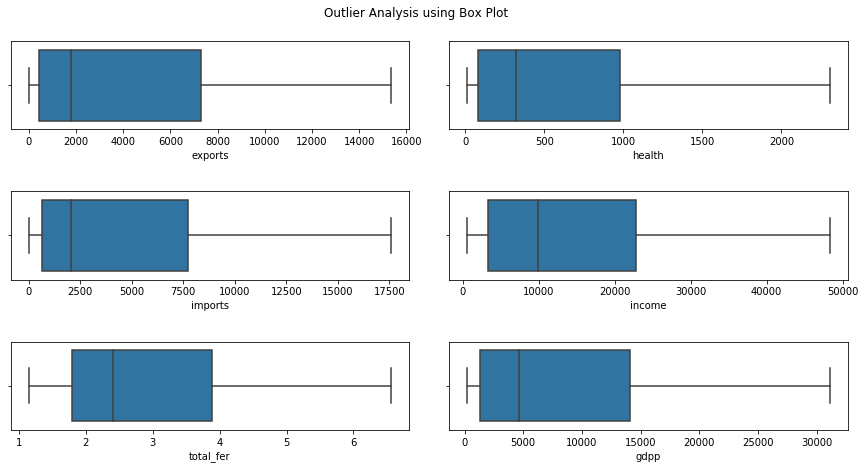

In [12]:
# Handling outliers

print("Handling outliers:")
print("- We are going to handle the outliers by capping them.")
print("- As our main objective is to find the countries which are in the direst need of aid,")
print("\t it is recommended not to cap the lower range, so we are going to cap only the upper range.")
print("- We will be performing capping for higher range based on the number of outliers.")
print("- The columns for which capping will be done are:")

cols_to_uppercap = numeric_cols[(numeric_cols.values != 'child_mort') & (numeric_cols.values != 'inflation') & (numeric_cols.values != 'life_expec')]
print(cols_to_uppercap)

print('\n______________________________________________________________________________\n')

print("Capping outliers...")

# Function to cap outliers
def perform_upper_cap(dataframe, cols_to_cap, upper_quant):
    # Looping over columsn to cap outliers
    for key, col_to_cap in enumerate(cols_to_cap):
        q4 = dataframe[col_to_cap].quantile(quantile_col_wise[key])
        dataframe[col_to_cap][dataframe[col_to_cap]>q4] = q4

# Setting quantiles for each column for capping
quantile_col_wise = [0.89, 0.86, 0.92, 0.95, 0.99, 0.85]
# Calling capping function
perform_upper_cap(country_df, cols_to_uppercap, quantile_col_wise)

print('\n______________________________________________________________________________\n')

print("Analysing the capped columns after outlier treatment")
plot_boxplot(country_df, cols_to_uppercap)

### Step 4: Visualising the Data
- #### 4.1: Univariate Analysis
- #### 4.2: Bivariate Analysis
- #### 4.3: Multivariate Analysis

- #### 4.1: Univariate Analysis

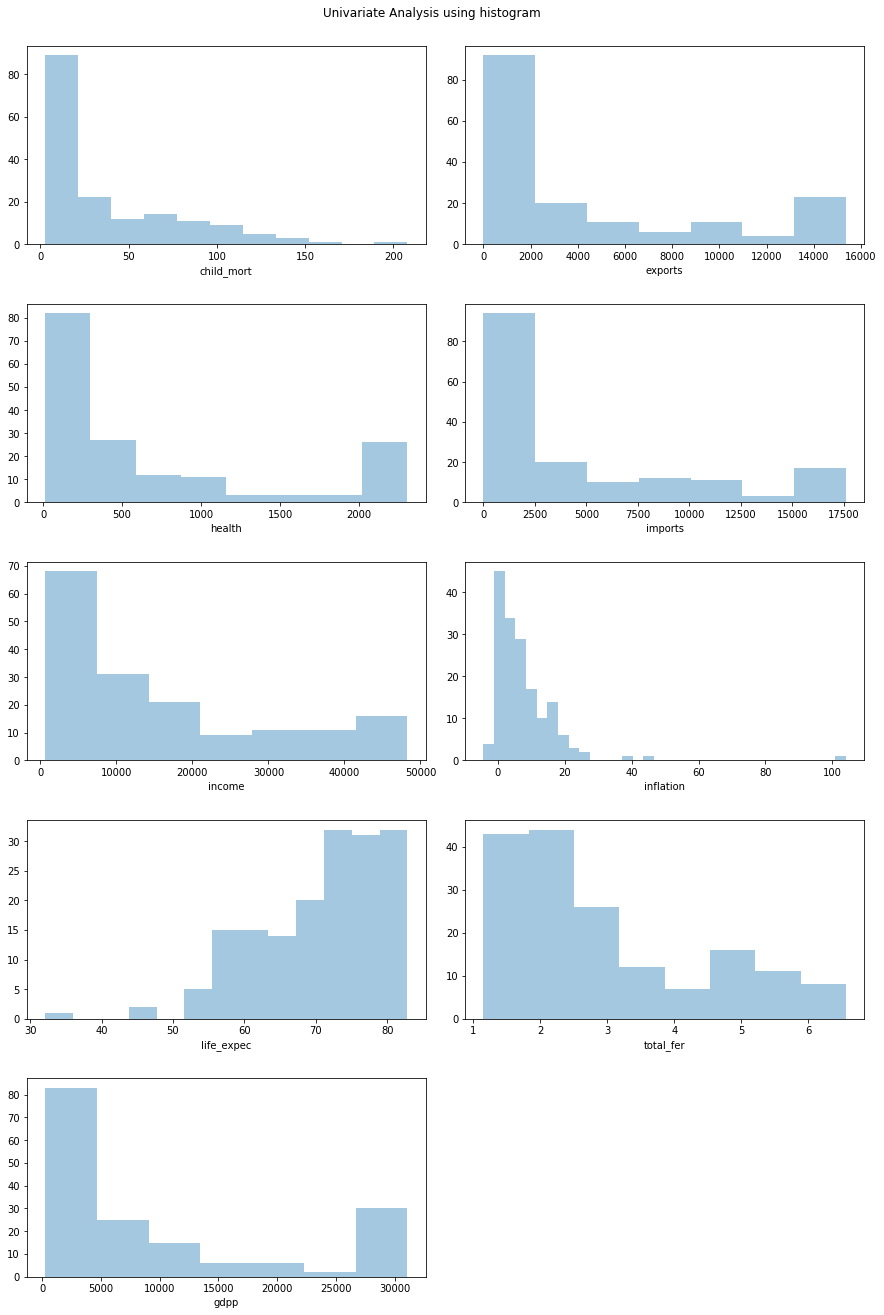

In [13]:
# Function to plot histogram
def plot_continuous_columns(dataframe, sel_cols):

    # Calculating the number of rows for subplot
    col_len = len(sel_cols)
    subplot_rows = (col_len//2) + (col_len%2)
    
    # Setting parameters for figure
    plt.figure(figsize=(15, 18))
    plt.suptitle('Univariate Analysis using histogram')
    plt.subplots_adjust(top = 0.95, bottom=0.0, hspace=0.3, wspace=0.1)
    
    # Looping over each feature to plot histogram
    for key, value in enumerate(sel_cols):
        # Plotting histogram
        plt.subplot(subplot_rows, 2, key+1)
        sns.distplot(dataframe[value], kde=False)
            
# Function call for plotting histogram
plot_continuous_columns(country_df, numeric_cols)

In [14]:
# Observations from univariate analysis

print('Observations from univariate analysis:\n')
print('- child_mort:')
print('\t- We can see that the child mortage has most of the data on the lower end. i.e. left skewed')
print('\t- Maximum frequency is in the range of 0 - 25')
print('- exports:')
print('\t- Most of the export data is concentrated between 25 to 50.')
print('\t- It is left skewed.')
print('- health')
print('\t- The health is wide spread approximately between 1 and 13')
print('\t- The frequency is maximum approximately in the range of 5-7')
print('- imports')
print('\t- The imports ia almost similar to exports but it is shifted slightly towards right.')
print('\t- It is left skewed with more spread than export.')
print('- income')
print('\t- The income is concentrated on the lower side.')
print('\t- The maximum frequency is between 500 - 8000.')
print('- inflation')
print('\t- We can see that inflation has negative values.')
print('\t- It is left skewed with maximum frequency in range 0 - 10.')
print('- life_expec')
print('\t- The life expectancy has more values towards the right side.')
print('\t- It is right skewed.')
print('- total_fer')
print('\t- The fertility is spread well but with mean around 2.3')
print('\t- Therefore maximum frequency is in the range of 2.')
print('- gdpp')
print('\t- The GDPP is heavily concentrated towards the lower end')
print('\t- However there are values spread over higher end to but with very low frequency.')

Observations from univariate analysis:

- child_mort:
	- We can see that the child mortage has most of the data on the lower end. i.e. left skewed
	- Maximum frequency is in the range of 0 - 25
- exports:
	- Most of the export data is concentrated between 25 to 50.
	- It is left skewed.
- health
	- The health is wide spread approximately between 1 and 13
	- The frequency is maximum approximately in the range of 5-7
- imports
	- The imports ia almost similar to exports but it is shifted slightly towards right.
	- It is left skewed with more spread than export.
- income
	- The income is concentrated on the lower side.
	- The maximum frequency is between 500 - 8000.
- inflation
	- We can see that inflation has negative values.
	- It is left skewed with maximum frequency in range 0 - 10.
- life_expec
	- The life expectancy has more values towards the right side.
	- It is right skewed.
- total_fer
	- The fertility is spread well but with mean around 2.3
	- Therefore maximum frequency is in 

- #### 4.2: Bivariate Analysis

Bivariate analysis using pairplot:


<Figure size 1440x1440 with 0 Axes>

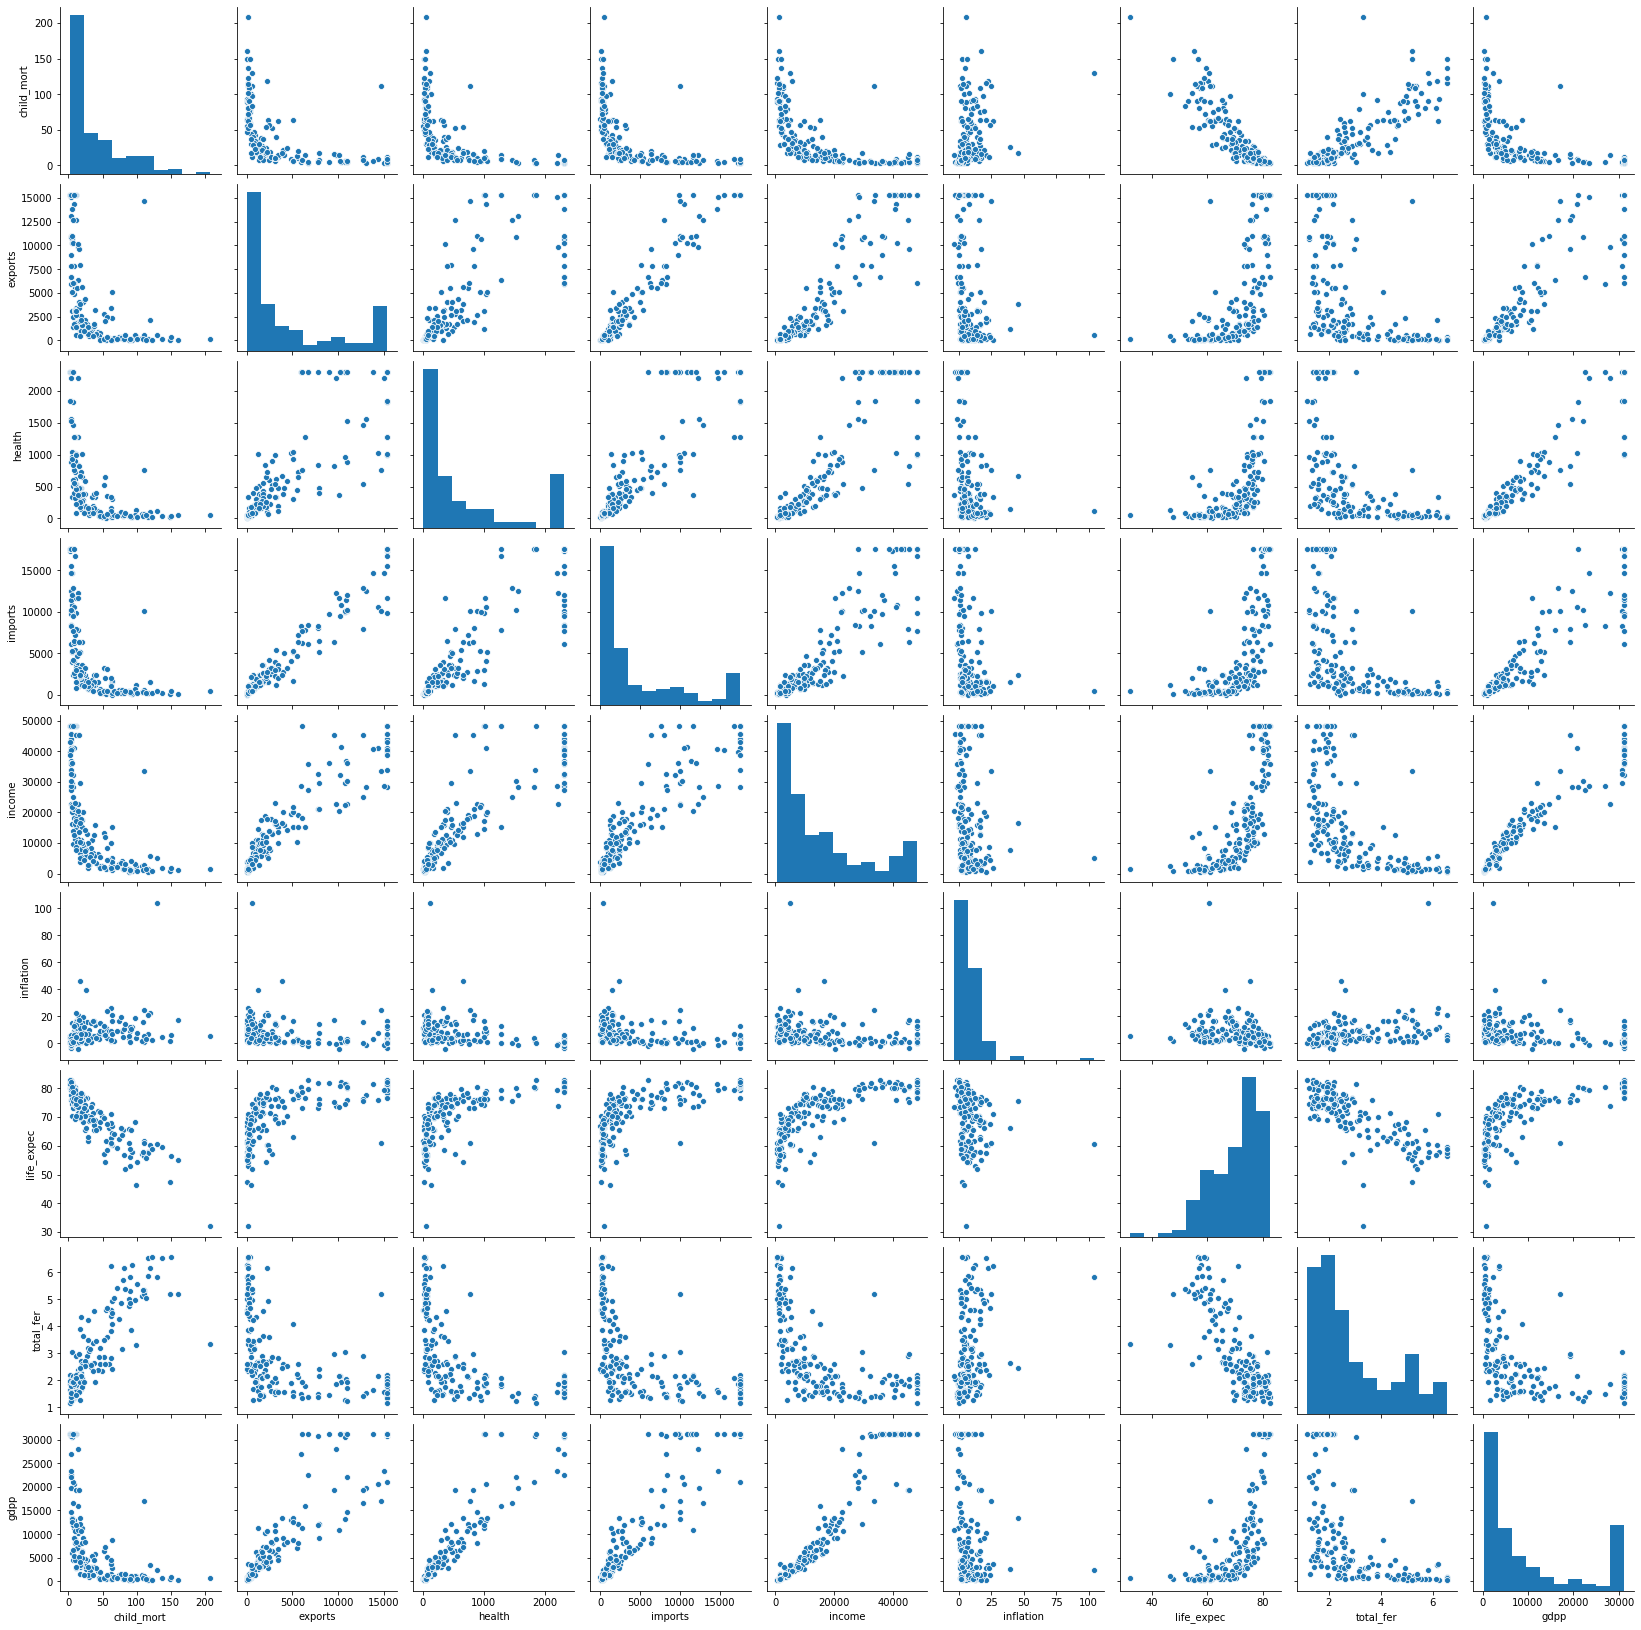

In [15]:
# Bivariate analysis using pairplot

print("Bivariate analysis using pairplot:")
plt.figure(figsize = (20, 20))
sns.pairplot(country_df)
plt.show()

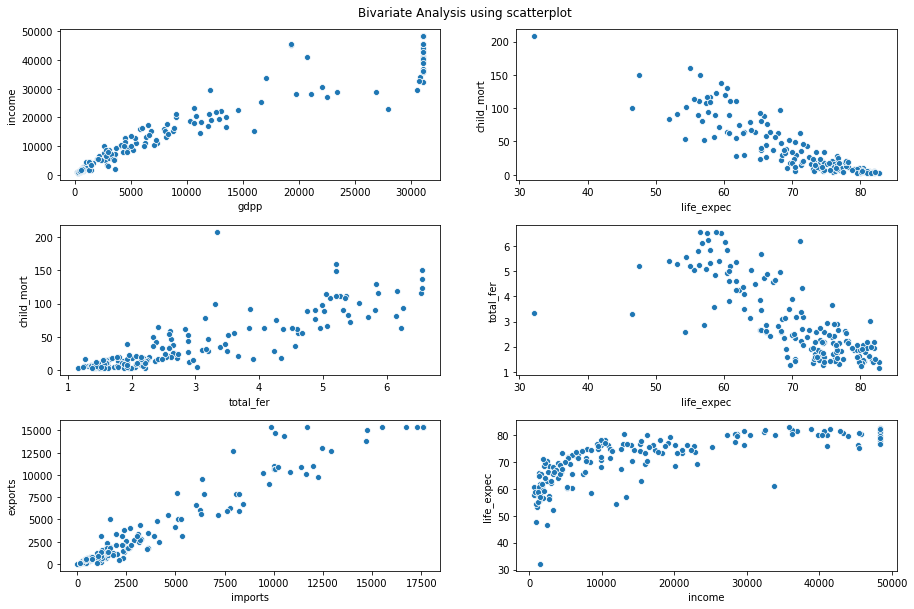

In [16]:
# Function to scatter plot
def bivariate_analysis_scatterplot(dataframe, features_pairs_list, hue_feature=None, title=None):
    
    # Calculating the number of rows for subplot
    col_len = len(features_pairs_list)
    subplot_rows = (col_len//2) + (col_len%2)
    
    # Setting parameters for figure
    title_suptitle = 'Bivariate Analysis using scatterplot' if (title == None) else title
    plt.figure(figsize=(15, 8))
    plt.suptitle(title_suptitle)
    plt.subplots_adjust(top = 0.94, bottom=0.0, hspace=0.3, wspace=0.2)
    
    # Looping over each feature pair to Scatterplot
    for key, value in enumerate(features_pairs_list):
        plt.subplot(subplot_rows, 2, key+1)
        sns.scatterplot(x=value[0], y=value[1], hue=hue_feature, data=dataframe)
    plt.show()

# Defining the column pairs for scatter plot
features_pairs_list = [['gdpp', 'income'], ['life_expec', 'child_mort'], ['total_fer', 'child_mort'], 
                       ['life_expec', 'total_fer'], ['imports', 'exports'], ['income', 'life_expec']]

# Function call for scatter plotting
bivariate_analysis_scatterplot(country_df, features_pairs_list)

In [17]:
# Observations from bivariate analysis

print("Observations from bivariate analysis: \n")
print("- gdpp vs income:")
print("\t- There is a positive linear relationship betwen gdpp and income.")
print("\t- It is understandable, as income is one of the main factors defining gdpp.")
print("- life_expec vs child_mort:")
print("\t- There exists a negative linear relationship between life_expec and child_mort.")
print("\t- This tells us that, as child_mort increases there will be less life_expec.")
print("- total_fer vs child_mort:")
print("\t- total_fer and child_mort has very strong positive linear relationship.")
print("\t- If the fertility rate increases then number of children born will increase leading to increase in child mortality.")
print("- life_expec vs total_fer:")
print("\t- Negative correlation exists between total_fer and life_expec.")
print("\t- Therefore, when fertility rate is more the life expectancy is reduced.")
print("- imports vs exports:")
print("\t- Imports and exports seem to be almost propotional.")
print("\t- It gives us an idea that as export increases, import increases.")
print("- income vs life_expec:")
print("\t- The relationship between income and life_expec is similar to a logarithmic pattern.")
print("\t- As the income increases over a minimum threshold the life_expec becomes almost a constant.")

Observations from bivariate analysis: 

- gdpp vs income:
	- There is a positive linear relationship betwen gdpp and income.
	- It is understandable, as income is one of the main factors defining gdpp.
- life_expec vs child_mort:
	- There exists a negative linear relationship between life_expec and child_mort.
	- This tells us that, as child_mort increases there will be less life_expec.
- total_fer vs child_mort:
	- total_fer and child_mort has very strong positive linear relationship.
	- If the fertility rate increases then number of children born will increase leading to increase in child mortality.
- life_expec vs total_fer:
	- Negative correlation exists between total_fer and life_expec.
	- Therefore, when fertility rate is more the life expectancy is reduced.
- imports vs exports:
	- Imports and exports seem to be almost propotional.
	- It gives us an idea that as export increases, import increases.
- income vs life_expec:
	- The relationship between income and life_expec is simil

- #### 4.3: Multivariate Analysis

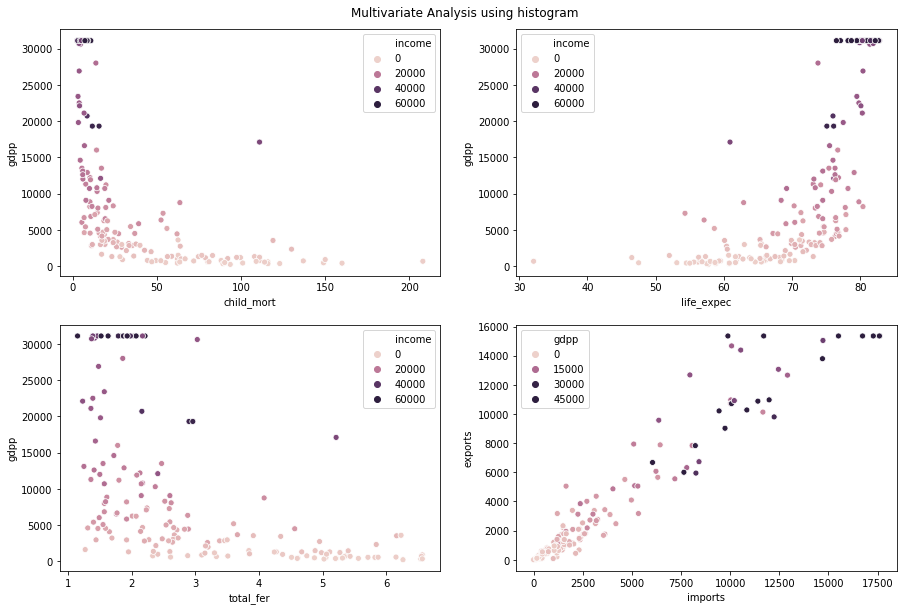

In [18]:
# Function to plot muti variate scatter plot
def multi_variate_scatter(dataframe, features_pairs_list):
    
    # Calculating the number of rows for subplot
    col_len = len(features_pairs_list)
    subplot_rows = (col_len//2) + (col_len%2)
    
    # Setting parameters for figure
    plt.figure(figsize=(15, 8))
    plt.suptitle('Multivariate Analysis using histogram')
    plt.subplots_adjust(top = 0.94, bottom=0.0, hspace=0.2, wspace=0.2)
    
    # Looping over each feature to plot histogram
    for key, value in enumerate(features_pairs_list):
        # Scatter plotting
        plt.subplot(subplot_rows, 2, key+1)
        sns.scatterplot(x=value[0], y=value[1], hue=value[2], data=dataframe)
        
# Defining the column pairs for scatter plot
features_pairs_list = [['child_mort', 'gdpp', 'income'], ['life_expec', 'gdpp', 'income'], ['total_fer', 'gdpp', 'income'], ['imports', 'exports', 'gdpp']]

# Function call for multivariate scatter plot
multi_variate_scatter(country_df, features_pairs_list)

In [19]:
# Observations from multivariate analysis

print("Observations from multivariate analysis: \n")
print("- child_mort vs gdpp vs income")
print("\t- We can observe that for countries with lower child mortality the income spread is between medium to maximum.")
print("\t- The mortality rate is consequently high when the income and gdpp is low.")
print("- life_expec vs gdpp vs income")
print("\t- The visualization shows that the gdpp and income is increasing for countries as life expectancy increases.")
print("\t- The gdpp is very less and almost same with life expectancy uptill 65.")
print("- total_fer vs gdpp vs income")
print("\t- The gdpp and income is in higher range for fertility rates in the range of 1 - 2.5.")
print("\t- As the feritility rate increases the income decreases, leading to decrease in gdpp.")
print("- imports vs exports vs gdpp")
print("\t - It shows that, the gdpp increases as the import and export increases.")
print("\t - However, there are few cases whose gdpp is in the middle range eventhough their import and export is high.")

Observations from multivariate analysis: 

- child_mort vs gdpp vs income
	- We can observe that for countries with lower child mortality the income spread is between medium to maximum.
	- The mortality rate is consequently high when the income and gdpp is low.
- life_expec vs gdpp vs income
	- The visualization shows that the gdpp and income is increasing for countries as life expectancy increases.
	- The gdpp is very less and almost same with life expectancy uptill 65.
- total_fer vs gdpp vs income
	- The gdpp and income is in higher range for fertility rates in the range of 1 - 2.5.
	- As the feritility rate increases the income decreases, leading to decrease in gdpp.
- imports vs exports vs gdpp
	 - It shows that, the gdpp increases as the import and export increases.
	 - However, there are few cases whose gdpp is in the middle range eventhough their import and export is high.


### Step 5: Rescaling the features

- #### 5.1: Rescaling using Standard Scaling

In [20]:
# Selecting all columns except 'country'
cols_sel = country_df.columns[country_df.columns != 'country']
country_df_sel = country_df[cols_sel]

# Instantiate standard scaler
scaler = StandardScaler()

# Applying scaling using fit_transform
print("Applying scaling using standard scaler...\n")
country_df_scaled = scaler.fit_transform(country_df_sel)

# Converting the scaled data to a dataframe
country_df_scaled = pd.DataFrame(country_df_scaled)
country_df_scaled.columns = cols_sel
print("Displaying the scaled dataframe:")
display(country_df_scaled.head())

Applying scaling using standard scaler...

Displaying the scaled dataframe:


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.831603,-0.797818,-0.803809,-0.958349,0.157336,-1.619092,1.926396,-0.864244
1,-0.538949,-0.626592,-0.514105,-0.489662,-0.394006,-0.312347,0.647866,-0.865054,-0.542231
2,-0.272833,-0.519856,-0.616946,-0.595729,-0.192552,0.789274,0.670423,-0.034983,-0.508546
3,2.007808,-0.428335,-0.724136,-0.575153,-0.667360,1.387054,-1.179234,2.153997,-0.593215
4,-0.695634,0.202145,0.073169,0.449119,0.227992,-0.601749,0.704258,-0.543736,0.196113


### Step 6: Modelling
- #### 6.1: Checking cluster tendency
- #### 6.2: K-means clustering
- #### 6.3: Hierarchical clustering

- #### 6.1: Checking cluster tendency

In [21]:
# Function to perform hopkins statistic
def hopkins(X):
    d = X.shape[1]
    n = len(X)
    m = int(0.1 * n) 
    # For finding the nearest neighbours
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
    # Random data for comparison
    rand_X = sample(range(0, n, 1), m)
    ujd = []
    wjd = []
    # Finding nearest neighbours of random uniform data and given data
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
    # Calculating hopkins statistic using formula
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
    return H

# Function call to find hopkins score
hopkins_score = hopkins(country_df_scaled)

print("Hopkins Statistics for cluster tendency:") 
print("- We can see that the hopkins statistics, gives a value of {0}.".format(round(hopkins_score,2)))
print("- As the value is greater than 0.7 (i.e. {0}), we can conclude that the data has a high tendency towards clustering.".format(round(hopkins_score,2)))

Hopkins Statistics for cluster tendency:
- We can see that the hopkins statistics, gives a value of 0.87.
- As the value is greater than 0.7 (i.e. 0.87), we can conclude that the data has a high tendency towards clustering.


- #### 6.2: K-means clustering
    - ###### 6.2.1: Finding the Optimal Number of Clusters
    - ###### 6.2.2: Performing K-means clustering
    - ###### 6.2.3: K-means cluster profiling

- #### 6.2.1: Finding the Optimal Number of Clusters

Finding optimal number of clusters using Elbow curve / SSD:


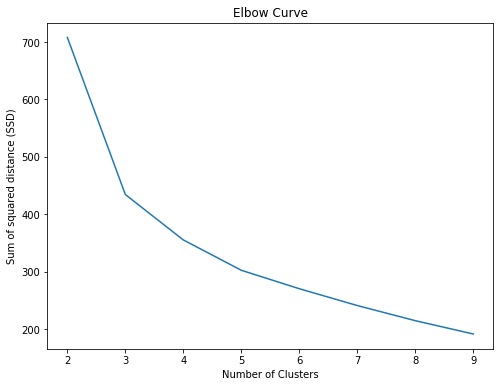

In [22]:
# Using Elbow-curve/SSD for finding optimal number of clusters

# Function to plot SSD
def plotSSD(scaled_df):
    ssd = []
    # Setting the range of clusters     
    range_n_clusters = range(2, 10)
    # Setting the configuratio for figure
    plt.figure(figsize=(8, 6))
    plt.title('Elbow Curve')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Sum of squared distance (SSD)')
    # Looping over different cluster counts
    for num_clusters in range_n_clusters:
        kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
        kmeans.fit(scaled_df)
        ssd.append(kmeans.inertia_)
    plt.plot(range_n_clusters, ssd)
    plt.show()
    
print("Finding optimal number of clusters using Elbow curve / SSD:")
# Function call to plot elbow curve
plotSSD(country_df_scaled)

In [23]:
print("Observations from elbow curve:")
print("- We can see that the location of bend (elbow) stops decreasing considerably after a cluster count of 3.")
print("- Therefore the elbow method suggests that 3 clusters are optimal for k-means clustering.")

Observations from elbow curve:
- We can see that the location of bend (elbow) stops decreasing considerably after a cluster count of 3.
- Therefore the elbow method suggests that 3 clusters are optimal for k-means clustering.


Finding optimal number of clusters using Solhouette Analysis:


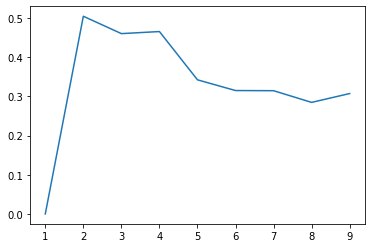

In [24]:
# Solhouette Analysis

# Function to perform silhouette analysis
def performSilhouetteAnalysis(scaled_df):
    silhoutte = [0]
    num_clusters_list = [1]
    # Looping over a range of cluster counts
    for num_clusters in range(2,10):
        # Intialise Kmeans and perform fit
        kmeans = KMeans(n_clusters=num_clusters, max_iter=50).fit(scaled_df)
        cluster_labels = kmeans.labels_
        # Calculating silhouette score
        silhouette_avg = silhouette_score(scaled_df, cluster_labels)
        # Appending to list
        num_clusters_list.append(num_clusters)
        silhoutte.append(silhouette_avg)
    plt.plot(num_clusters_list, silhoutte)

print("Finding optimal number of clusters using Solhouette Analysis:")
# Function call to plot silhouette analysis
performSilhouetteAnalysis(country_df_scaled)     

In [25]:
print("Observations from silhouette analysis:")
print("- We can see that the location of the global maxima is at 2.")
print("- This suggests us that the optimal number of clusters is 2.")
print("- But, two clusters is very less and will not give good inferences.")
print("\n")
print("- Therefore, we are going to set the cluster count as 3 for k-means clustering.")

Observations from silhouette analysis:
- We can see that the location of the global maxima is at 2.
- This suggests us that the optimal number of clusters is 2.
- But, two clusters is very less and will not give good inferences.


- Therefore, we are going to set the cluster count as 3 for k-means clustering.


- ###### 6.2.2: Performing K-means clustering

In [26]:
# Setting the count of clusters for k-means clustering
cluster_count_kmeans = 3

# Performing K-means clustering
print("Performing k-means clustering for {0} clusters...\n".format(cluster_count_kmeans))
kmeans = KMeans(n_clusters=cluster_count_kmeans, random_state=50)
kmeans.fit(country_df_scaled)

# Assigning the label
country_df_sel['cluster_id_kmeans'] = kmeans.labels_

# Displaying dataframe after cluster labels are assinged
print("Displaying dataframe after cluster labels are assinged:")
display(country_df_sel.head())

Performing k-means clustering for 3 clusters...

Displaying dataframe after cluster labels are assinged:


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id_kmeans
0,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,2
1,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0
2,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0
3,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,2
4,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0


- ###### 6.2.3: K-means cluster profiling

Number of countries grouped per cluster:


,Cluster ID,Count
0,0,81
2,2,45
1,1,41


Analysing the clusters obtained from K-means clustering, using box plot:


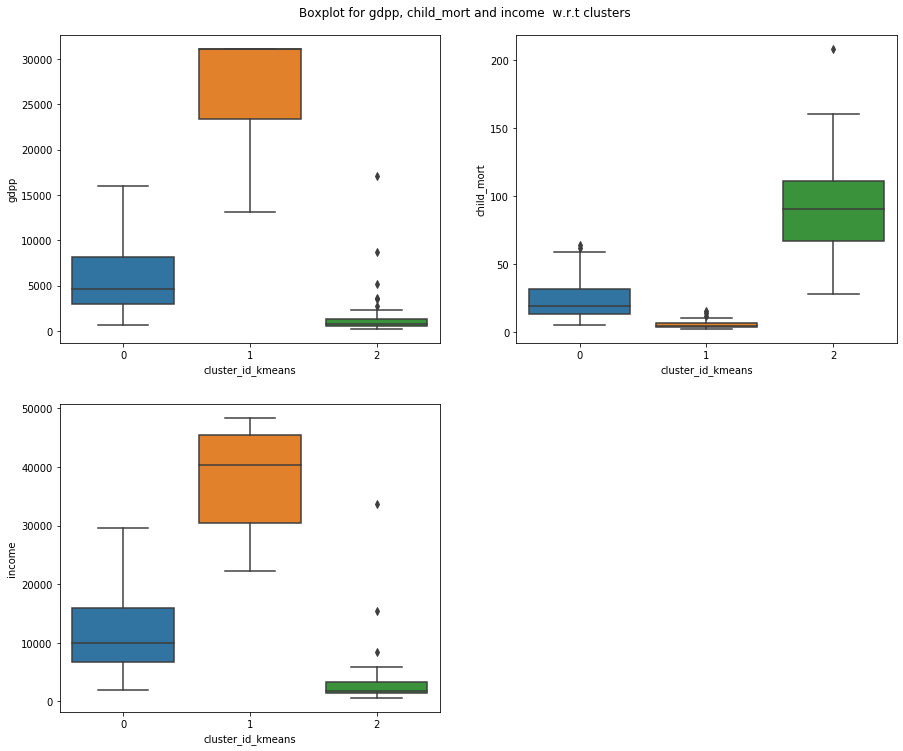

Observations of clusters obtained from K-means clustering:
- gdpp vs cluster_id_kmeans:
	 - Cluster 2 comprises of the countries which have very low gdpp, however it has few outliers.
	 - The medium range of gdpp is captured in cluster 0 and higher range in cluster 1.
- child_mort vs cluster_id_kmeans:
	 - We can observe that the cluster 2 has a higher range of child mortality.
	 - The cluster 1 groups the countries with lowest child_mort.
- income vs cluster_id_kmeans:
	 - Similar to gdpp, lower range income is clustered in group 2.
	 - Higher range of income is captured in cluster 1 and mid range is captured in cluster 1.


In [27]:
# Function to calculate number of countries grouped per cluster
def disp_cluster_valuecounts(dataframe, cluster_id):
    clust_count_data = {'Cluster ID': list(dataframe[cluster_id].value_counts().index), 
                            'Count': dataframe[cluster_id].value_counts()}
    display(pd.DataFrame(clust_count_data))
    
print("Number of countries grouped per cluster:")
# Function call to display the number of countries grouped per cluster
disp_cluster_valuecounts(country_df_sel, 'cluster_id_kmeans')

# Analysing the clusters obtained from K-means clustering, using box plot
# Function for box plotting
def plotBoxPlotCols(dataframe, cluster_label, sel_cols):
    
    # Calculating the number of rows for subplot
    col_len = len(sel_cols)
    subplot_rows = (col_len//2) + (col_len%2)
    
    # Setting parameters for figure
    plt.figure(figsize=(15,10))
    plt.suptitle('Boxplot for gdpp, child_mort and income  w.r.t clusters')
    plt.subplots_adjust(top = 0.94, bottom=0.0, hspace=0.2, wspace=0.2)
    
    for key, value in enumerate(sel_cols):
        plt.subplot(subplot_rows, 2, key+1)
        sns.boxplot(x=cluster_label, y=value, data=dataframe)
    plt.show()

print("Analysing the clusters obtained from K-means clustering, using box plot:")
cols_profiling = ['gdpp', 'child_mort', 'income']
plotBoxPlotCols(country_df_sel, 'cluster_id_kmeans', cols_profiling)

print("Observations of clusters obtained from K-means clustering:")
print("- gdpp vs cluster_id_kmeans:")
print("\t - Cluster 2 comprises of the countries which have very low gdpp, however it has few outliers.")
print("\t - The medium range of gdpp is captured in cluster 0 and higher range in cluster 1.")
print("- child_mort vs cluster_id_kmeans:")
print("\t - We can observe that the cluster 2 has a higher range of child mortality.")
print("\t - The cluster 1 groups the countries with lowest child_mort.")
print("- income vs cluster_id_kmeans:")
print("\t - Similar to gdpp, lower range income is clustered in group 2.")
print("\t - Higher range of income is captured in cluster 1 and mid range is captured in cluster 1.")

Analysing the clusters obtained using bar plot and scatter plot:


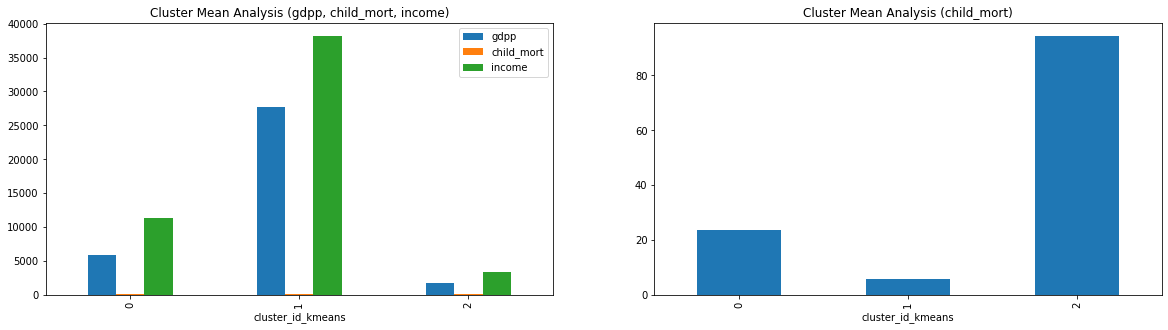

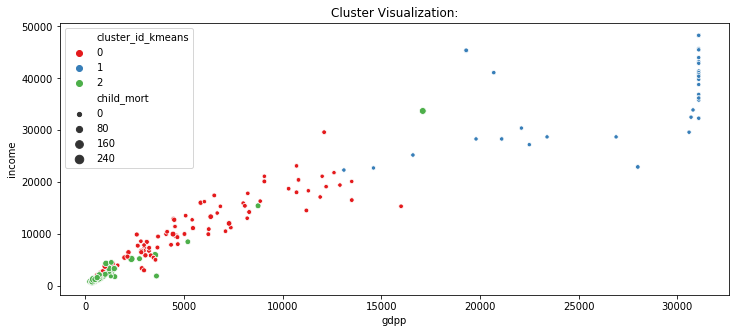

Observations of clusters obtained from K-means clustering:
- From the cluster mean analysis:
	- We can see that the lower range is captured well by group 2 in the case of gdpp and income.
	- The child mortgage is also high for the cluster 2.
- From the cluster visualization:
	- We can see that the lower range for income and gdpp is captured in cluster 2 but has high child_mort.
	- The mid range of income and gdpp is grouped in cluster 0 and high range in clustered in cluster 1.
	- There are very few countries which are misclustered.


In [28]:
# Function for cluster profiling
def clust_prof_plots(dataframe, group_id, cols_to_plot, spl_col):
    
    # Set parameters for bar plot
    fig = plt.figure()
    ax1 = fig.add_subplot(121)
    ax1.set_title("Cluster Mean Analysis (gdpp, child_mort, income)")
    ax2 = fig.add_subplot(122)
    ax2.set_title("Cluster Mean Analysis (child_mort)")
    
    # Bar plot of cluster means
    dataframe.groupby(group_id)[cols_to_plot].mean().plot(kind='bar', figsize=(20,5), ax=ax1)
    dataframe.groupby(group_id)[spl_col].mean().plot(kind='bar', figsize=(20,5), ax=ax2)
    
    # Set parameters for scatter plot
    fig2 = plt.figure(figsize=(12,5))
    ax3 = fig2.add_subplot(111)
    ax3.set_title("Cluster Visualization:")
    
    # Setting feature parameters for scatter plot
    x_y_hue_size = ['gdpp', 'income', group_id, 'child_mort']
    
    # Scatter plot of clusters
    sns.scatterplot(x = x_y_hue_size[0], y = x_y_hue_size[1], hue = x_y_hue_size[2], 
                    size = x_y_hue_size[3], data = dataframe, palette = 'Set1', ax=ax3)
    plt.show()

# Analysing the clusters obtained using bar plot and scatter plot
print("Analysing the clusters obtained using bar plot and scatter plot:")
clust_prof_plots(country_df_sel, 'cluster_id_kmeans', cols_profiling, 'child_mort')

print("Observations of clusters obtained from K-means clustering:")
print("- From the cluster mean analysis:")
print("\t- We can see that the lower range is captured well by group 2 in the case of gdpp and income.")
print("\t- The child mortgage is also high for the cluster 2.")
print("- From the cluster visualization:")
print("\t- We can see that the lower range for income and gdpp is captured in cluster 2 but has high child_mort.")
print("\t- The mid range of income and gdpp is grouped in cluster 0 and high range in clustered in cluster 1.")
print("\t- There are very few countries which are misclustered.")

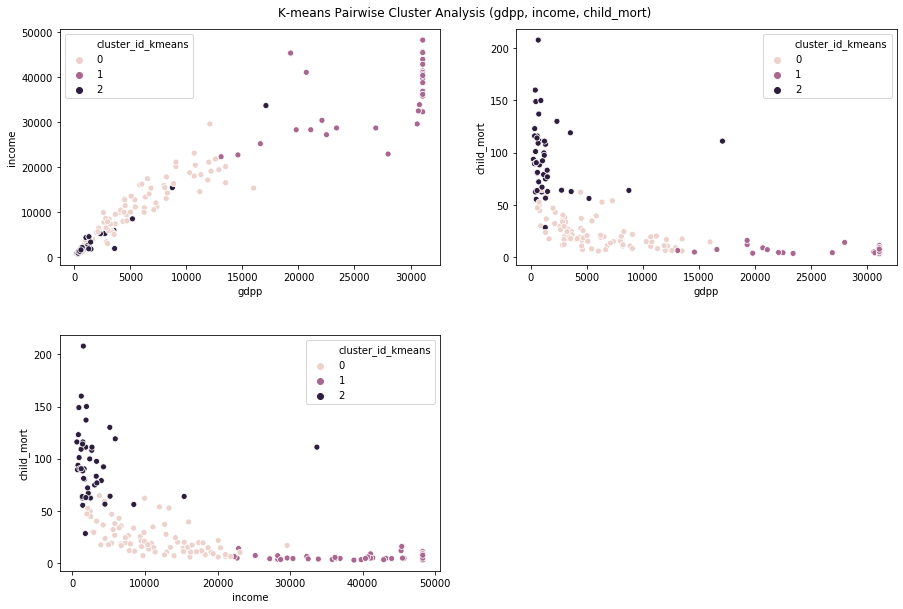

Observations of pairwise clusters obtained from K-means clustering:
- We can see that for income - child_mort and gdpp - child_mort pair we can see three clusters are clearly meaningful.
	 - High income/gdpp and low child_mort is clustered as 1.
	 - Meidum income/gdpp and Low child_mort is clustered as 0.
	 - Low income/gdpp and High child_mort is clustered as 2.
- For income - gdpp pair, there are three clusters split based on low (2), medium (0) and high range values (1).
______________________________________________________________________________

The cluster 2 represents the countries which have low income, low gdpp and high child_mort.
The number of countries clustered in cluster 2 is 45
The top 5 countries which are in the most need of aid as given by k-means clusterting algorithm is:


,gdpp,child_mort,income,country
26,231.0,93.6,764.0,Burundi
88,327.0,89.3,700.0,Liberia
37,334.0,116.0,609.0,"Congo, Dem. Rep."
112,348.0,123.0,814.0,Niger
132,399.0,160.0,1220.0,Sierra Leone


In [29]:
# K-means Pairwise cluster analysis

# Setting column pairs
cols_prof_pairs = [['gdpp', 'income'], ['gdpp', 'child_mort'], ['income', 'child_mort']]

# Calling scatter plot function
bivariate_analysis_scatterplot(country_df_sel, cols_prof_pairs, 'cluster_id_kmeans', 'K-means Pairwise Cluster Analysis (gdpp, income, child_mort)')

# Observations of pairwise clusters obtained from K-means clustering
print("Observations of pairwise clusters obtained from K-means clustering:")
print("- We can see that for income - child_mort and gdpp - child_mort pair we can see three clusters are clearly meaningful.")
print("\t - High income/gdpp and low child_mort is clustered as 1.")
print("\t - Meidum income/gdpp and Low child_mort is clustered as 0.")
print("\t - Low income/gdpp and High child_mort is clustered as 2.")
print("- For income - gdpp pair, there are three clusters split based on low (2), medium (0) and high range values (1).")

print('______________________________________________________________________________\n')

print("The cluster 2 represents the countries which have low income, low gdpp and high child_mort.")
print("The number of countries clustered in cluster 2 is {0}".format(len(country_df_sel[country_df_sel['cluster_id_kmeans'] == 2])))

# Sorting cluster 2 on the basis of gdpp, child_mort and income
print("The top 5 countries which are in the most need of aid as given by k-means clusterting algorithm is:")
top_5_count_kmeans = country_df_sel[country_df_sel['cluster_id_kmeans'] == 2].sort_values(by = cols_profiling, ascending = [True, False, True])[cols_profiling].head(5)
top_5_count_kmeans['country'] = country_df.iloc[top_5_count_kmeans.index]['country']
display(top_5_count_kmeans)

- #### 6.3: Hierarchical clustering
    - ###### 6.3.1: Single linkage hierarchical clustering
    - ###### 6.3.2: Single linkage cluster profiling
    - ###### 6.3.3: Complete linkage hierarchical clustering
    - ###### 6.3.4: Complete linkage cluster profiling

- ###### 6.3.1: Single linkage hierarchical clustering

Performing single linkage hierarchical clustering...
______________________________________________________________________________

Dendrogram obtained using single linkage hierarchical clustering:


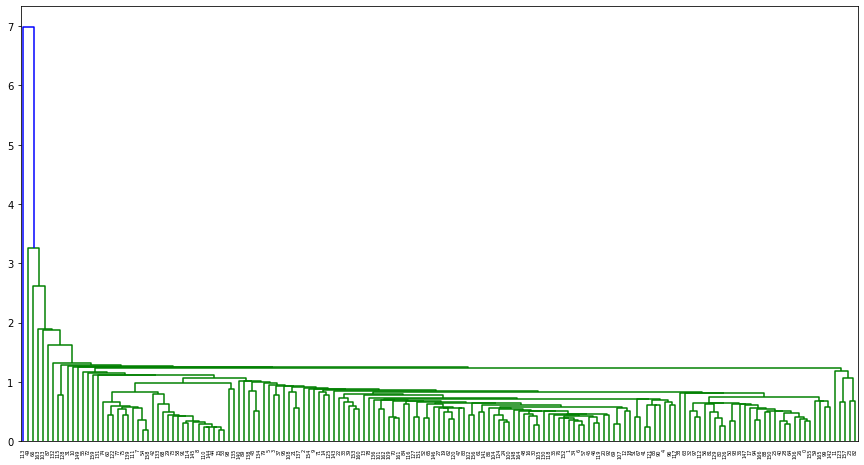

In [30]:
# Performing single linkage hierarchical clustering
print("Performing single linkage hierarchical clustering...")
mergings = linkage(country_df_scaled, method="single", metric='euclidean')

print('______________________________________________________________________________\n')

# Visualing dendrogram
print("Dendrogram obtained using single linkage hierarchical clustering:")
plt.figure(figsize=(15,8))
dendrogram(mergings)
plt.show()

- ###### 6.3.2: Single linkage cluster profiling

In [31]:
print("Observations from dengdrogam of single linkage heirarchical clustering:")
print("- The dendrogram obtained using this method does not exhibit good clusters.")
print("- Because, if we cut the dendrogram at cluster count of 4 almost 3 clusters have only one datapoint each.")
print("- Clusters obtained with this linkage method will not be meaningful.")
print("- Therefore, we will not proceed with this type of hierarchical clustering.")

Observations from dengdrogam of single linkage heirarchical clustering:
- The dendrogram obtained using this method does not exhibit good clusters.
- Because, if we cut the dendrogram at cluster count of 4 almost 3 clusters have only one datapoint each.
- Clusters obtained with this linkage method will not be meaningful.
- Therefore, we will not proceed with this type of hierarchical clustering.


- ###### 6.3.3: Complete linkage hierarchical clustering

Performing complete linkage hierarchical clustering...
______________________________________________________________________________

Dendrogram obtained using complete linkage hierarchical clustering:


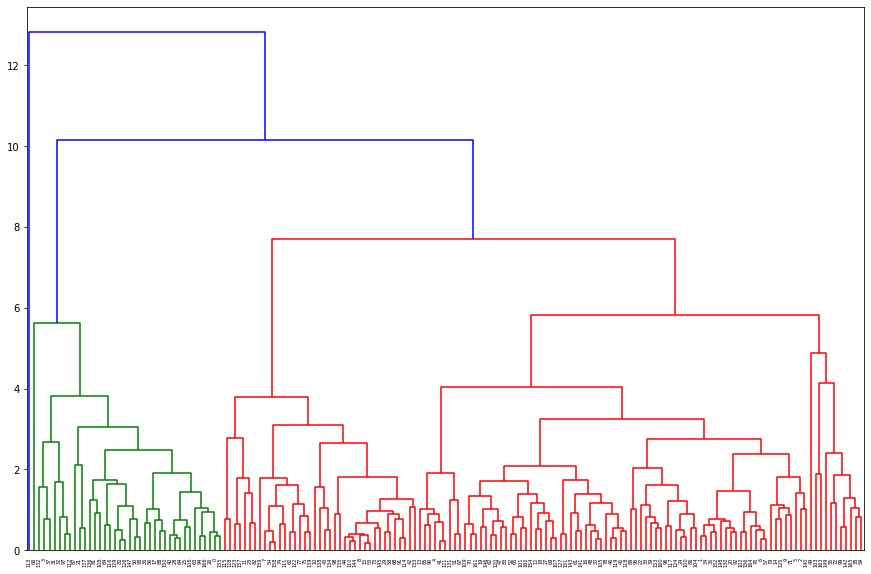

______________________________________________________________________________

As the vertical distance is considerably high for a cluster count of 4.
We will be cutting the tree at the cluster count (4) to obtain cluster labels...
______________________________________________________________________________

Dataframe obtained after assigning cluster labels


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id_kmeans,cluster_id_heir_comp
0,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,2,0
1,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0,1
2,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0,1
3,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,2,0
4,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0,1


In [32]:
# Performing complete linkage hierarchical clustering
print("Performing complete linkage hierarchical clustering...")
mergings = linkage(country_df_scaled, method="complete", metric='euclidean')

print('______________________________________________________________________________\n')

# Visualing dendrogram
print("Dendrogram obtained using complete linkage hierarchical clustering:")
plt.figure(figsize=(15,10))
dendrogram(mergings)
plt.show()

print('______________________________________________________________________________\n')

# Cutting the tree at the meaningful cluster count to obtain cluster labels
cluster_count_complink_hier = 4
print("As the vertical distance is considerably high for a cluster count of {0}.".format(cluster_count_complink_hier))
print("We will be cutting the tree at the cluster count ({0}) to obtain cluster labels...".format(cluster_count_complink_hier))
cluster_labels = cut_tree(mergings, n_clusters=cluster_count_complink_hier).reshape(-1, )
cluster_labels

print('______________________________________________________________________________\n')

# Assigning cluster labels
print("Dataframe obtained after assigning cluster labels")
country_df_sel['cluster_id_heir_comp'] = cluster_labels
country_df_sel.head()

- ###### 6.3.4: Complete linkage cluster profiling

Number of countries grouped per cluster:


,Cluster ID,Count
1,1,89
2,2,39
0,0,38
3,3,1


Analysing the clusters obtained, using box plot


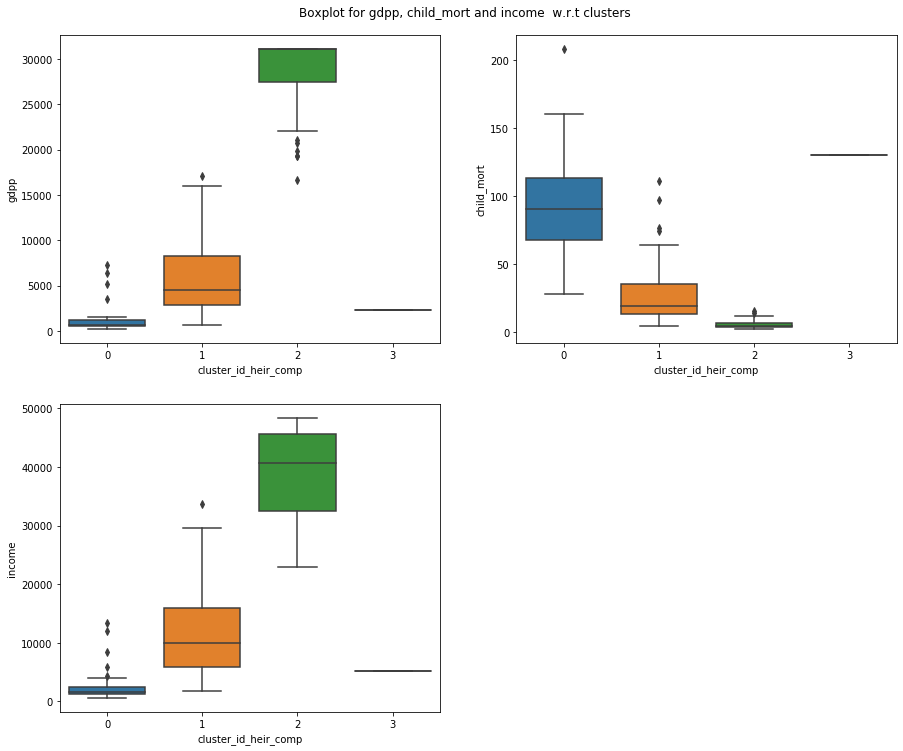

Observations of clusters obtained from complete linkage heirarchical clustering:
- There is one cluster with only one value, which is a very less value for cluster grouping.
- gdpp vs cluster_id_kmeans:
	 - Cluster 0 comprises of the countries which have very low gdpp.
	 - The mid range of gdpp is captured in cluster 1 and high range is captured in cluster 2.
	 - However, there is one cluster (cluster 3) with one value which is slightly above the cluster 0.
- child_mort vs cluster_id_kmeans:
	 - We can observe that the cluster 0 has medium to high range of child mortality.
	 - The cluster 2 groups the countries with lowest child_mort, also a high value is captured in cluster 2.
	 - The lower mid range of child_mort is captured by cluster 1.
- income vs cluster_id_kmeans:
	 - Similar to gdpp, lower range income is clustered in group 0.
	 - Lower middle to upper middle range of income is captured in cluster 1. High range is captured in cluster 2.
	 - A income value slightly above cluster

In [33]:
print("Number of countries grouped per cluster:")
disp_cluster_valuecounts(country_df_sel, 'cluster_id_heir_comp')

# Analysing the clusters obtained, using box plot
print("Analysing the clusters obtained, using box plot")
# Function call for box plotting
plotBoxPlotCols(country_df_sel, 'cluster_id_heir_comp', cols_profiling)

print("Observations of clusters obtained from complete linkage heirarchical clustering:")
print("- There is one cluster with only one value, which is a very less value for cluster grouping.")
print("- gdpp vs cluster_id_kmeans:")
print("\t - Cluster 0 comprises of the countries which have very low gdpp.")
print("\t - The mid range of gdpp is captured in cluster 1 and high range is captured in cluster 2.")
print("\t - However, there is one cluster (cluster 3) with one value which is slightly above the cluster 0.")
print("- child_mort vs cluster_id_kmeans:")
print("\t - We can observe that the cluster 0 has medium to high range of child mortality.")
print("\t - The cluster 2 groups the countries with lowest child_mort, also a high value is captured in cluster 2.")
print("\t - The lower mid range of child_mort is captured by cluster 1.")
print("- income vs cluster_id_kmeans:")
print("\t - Similar to gdpp, lower range income is clustered in group 0.")
print("\t - Lower middle to upper middle range of income is captured in cluster 1. High range is captured in cluster 2.")
print("\t - A income value slightly above cluster 0 and below cluster 2 is captured in cluster 1.")

Analysing the clusters obtained using bar plot and scatter plot:


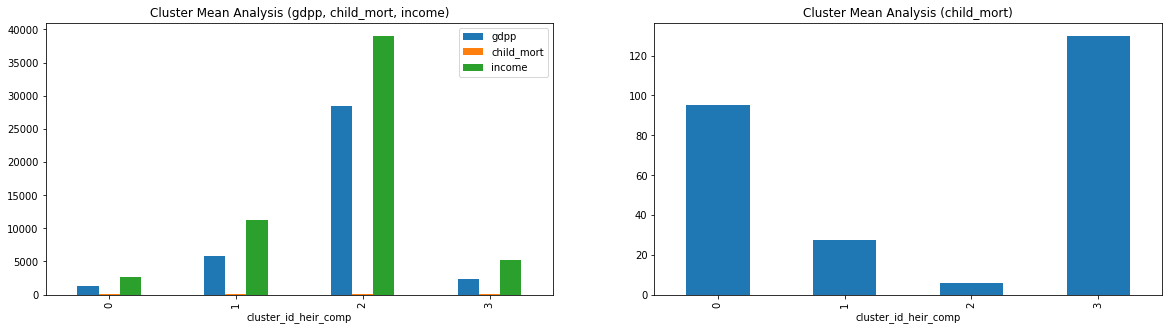

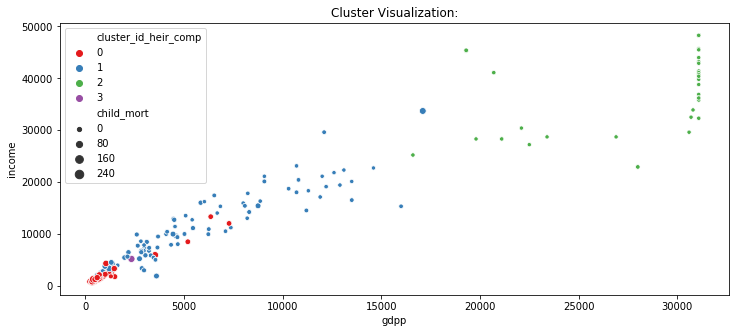

Observations of clusters obtained from complete linkage heirarchical clustering:
- From the cluster mean analysis and cluster visualization:
	- We can see that the lower range is captured well by group 0 in the case of gdpp and income.
	- The child mortgage is considerable high for the cluster 0.
	- However the cluster 3 has high child_mort value which was supposed to be captured in cluster 0.
	- The lower mid range (income and gdpp) is capture in cluster 3 and upper mid rangeis captured in cluster 1.
	- The higher range is captured well in cluster 2, which has very low child_mort too.


In [34]:
# Analysing the clusters obtained using bar plot and scatter plot

print("Analysing the clusters obtained using bar plot and scatter plot:")
# Function call for cluster profiling plots
clust_prof_plots(country_df_sel, 'cluster_id_heir_comp', cols_profiling, 'child_mort')

print("Observations of clusters obtained from complete linkage heirarchical clustering:")
print("- From the cluster mean analysis and cluster visualization:")
print("\t- We can see that the lower range is captured well by group 0 in the case of gdpp and income.")
print("\t- The child mortgage is considerable high for the cluster 0.")
print("\t- However the cluster 3 has high child_mort value which was supposed to be captured in cluster 0.")
print("\t- The lower mid range (income and gdpp) is capture in cluster 3 and upper mid rangeis captured in cluster 1.")
print("\t- The higher range is captured well in cluster 2, which has very low child_mort too.")

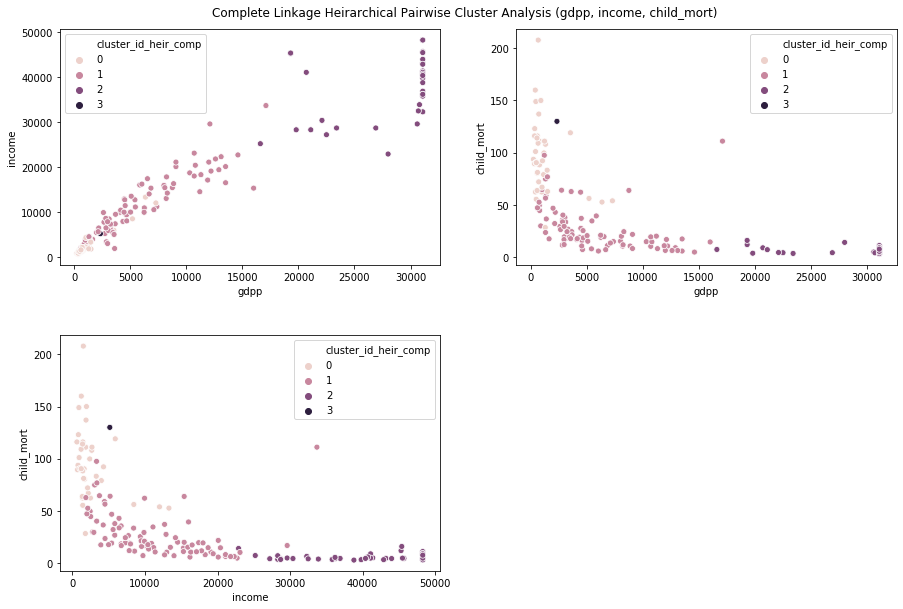

Observations of pairwise clusters obtained from Complete Linkage Heirarchical clustering:
- We can only see that there are three clusters clearly visible.
- One cluster is not visible because it has only one datapoint in it.
gdpp vs child mort and income vs child_mort:
- We can see the following clusters:
	 - Low child_mort, high income / gdpp is grouped in cluster 2.
	 - Low child_mort, medium income / gdpp is grouped in cluster 1.
	 - High child_mort, low income / gdpp is grouped in cluster 0 and 3.
income vs gdpp:
- As the income and gdpp are linearly related the following groupings are present:
	 - Low gdpp low income are grouped in cluster 0.
	 - Medium gdpp medium income are grouped in cluster 1.
	 - High gdpp High income are grouped in cluster 2.
______________________________________________________________________________

The cluster 0 represents the countries which have low income, low gdpp and high child_mort.
The number of countries clustered in cluster 0 is 38
The top 5 c

,gdpp,child_mort,income,country
26,231.0,93.6,764.0,Burundi
88,327.0,89.3,700.0,Liberia
37,334.0,116.0,609.0,"Congo, Dem. Rep."
112,348.0,123.0,814.0,Niger
132,399.0,160.0,1220.0,Sierra Leone


In [35]:
# Calling scatter plot function
bivariate_analysis_scatterplot(country_df_sel, cols_prof_pairs, 'cluster_id_heir_comp', 'Complete Linkage Heirarchical Pairwise Cluster Analysis (gdpp, income, child_mort)')

# Observations of pairwise clusters obtained from K-means clustering
print("Observations of pairwise clusters obtained from Complete Linkage Heirarchical clustering:")
print("- We can only see that there are three clusters clearly visible.")
print("- One cluster is not visible because it has only one datapoint in it.")
print("gdpp vs child mort and income vs child_mort:")
print("- We can see the following clusters:")
print("\t - Low child_mort, high income / gdpp is grouped in cluster 2.")
print("\t - Low child_mort, medium income / gdpp is grouped in cluster 1.")
print("\t - High child_mort, low income / gdpp is grouped in cluster 0 and 3.")
print("income vs gdpp:")
print("- As the income and gdpp are linearly related the following groupings are present:")
print("\t - Low gdpp low income are grouped in cluster 0.")
print("\t - Medium gdpp medium income are grouped in cluster 1.")
print("\t - High gdpp High income are grouped in cluster 2.")

print('______________________________________________________________________________\n')

print("The cluster 0 represents the countries which have low income, low gdpp and high child_mort.")
print("The number of countries clustered in cluster 0 is {0}".format(len(country_df_sel[country_df_sel['cluster_id_heir_comp'] == 0])))

# Sorting cluster 0 on the basis of gdpp, child_mort and income
print("The top 5 countries which are in the most need of aid as given by Complete Linkage Heirarchical clusterting algorithm is:")
top_5_count_comp_heir = country_df_sel[country_df_sel['cluster_id_heir_comp'] == 0].sort_values(by = cols_profiling, ascending = [True, False, True])[cols_profiling].head(5)
top_5_count_comp_heir['country'] = country_df.iloc[top_5_count_comp_heir.index]['country']
display(top_5_count_comp_heir)

### Step 7: Final Words and Recommendations

In [36]:
# List of countries which were suggested by K-means
print('For k-means,')
print('- The cluster 2 represents the countries which have low gdpp, low income and high child_mort.')
print('- The number of countries which are grouped in cluster 2 is {0}'.format(len(country_df_sel[country_df_sel['cluster_id_kmeans'] == 2])))

# Appending country column to dataframe
country_df_sel['country'] = country_df.iloc[country_df_sel.index]['country']
# Rearranging and displaying dataframe
print('- Viewing the first 5 records of the dataframe in cluster 2:')
display(country_df_sel[top_5_count_kmeans.columns][country_df_sel['cluster_id_kmeans'] == 2][['country', 'gdpp', 'child_mort', 'income']].head(5))

print('______________________________________________________________________________\n')


print('- Out of these {0} countries, the top 5 countries which are in most need of the aid are:'.format(len(country_df_sel[country_df_sel['cluster_id_kmeans'] == 2])))
display(top_5_count_kmeans[['country', 'gdpp', 'child_mort', 'income']])

For k-means,
- The cluster 2 represents the countries which have low gdpp, low income and high child_mort.
- The number of countries which are grouped in cluster 2 is 45
- Viewing the first 5 records of the dataframe in cluster 2:


,country,gdpp,child_mort,income
0,Afghanistan,553.0,90.2,1610.0
3,Angola,3530.0,119.0,5900.0
17,Benin,758.0,111.0,1820.0
25,Burkina Faso,575.0,116.0,1430.0
26,Burundi,231.0,93.6,764.0


______________________________________________________________________________

- Out of these 45 countries, the top 5 countries which are in most need of the aid are:


,country,gdpp,child_mort,income
26,Burundi,231.0,93.6,764.0
88,Liberia,327.0,89.3,700.0
37,"Congo, Dem. Rep.",334.0,116.0,609.0
112,Niger,348.0,123.0,814.0
132,Sierra Leone,399.0,160.0,1220.0


In [37]:
# List of countries which were suggested by complete linkage hierarchical clustering
print('For complete linkage hierarchical clustering,')
print('- The cluster 0 represents the countries which have low gdpp, low income and high child_mort.')
print('- The number of countries which are grouped in cluster 0 is {0}'.format(len(country_df_sel[country_df_sel['cluster_id_heir_comp'] == 2])))

# Rearranging and displaying dataframe
print('- Viewing the first 5 records of the dataframe in cluster 0:')
display(country_df_sel[top_5_count_kmeans.columns][country_df_sel['cluster_id_heir_comp'] == 0][['country', 'gdpp', 'child_mort', 'income']].head(5))

print('______________________________________________________________________________\n')

print('- Out of these {0} countries, the top 5 countries which are in most need of the aid are:'.format(len(country_df_sel[country_df_sel['cluster_id_heir_comp'] == 2])))
display(top_5_count_comp_heir[['country', 'gdpp', 'child_mort', 'income']])

For complete linkage hierarchical clustering,
- The cluster 0 represents the countries which have low gdpp, low income and high child_mort.
- The number of countries which are grouped in cluster 0 is 39
- Viewing the first 5 records of the dataframe in cluster 0:


,country,gdpp,child_mort,income
0,Afghanistan,553.0,90.2,1610.0
3,Angola,3530.0,119.0,5900.0
17,Benin,758.0,111.0,1820.0
21,Botswana,6350.0,52.5,13300.0
25,Burkina Faso,575.0,116.0,1430.0


______________________________________________________________________________

- Out of these 39 countries, the top 5 countries which are in most need of the aid are:


,country,gdpp,child_mort,income
26,Burundi,231.0,93.6,764.0
88,Liberia,327.0,89.3,700.0
37,"Congo, Dem. Rep.",334.0,116.0,609.0
112,Niger,348.0,123.0,814.0
132,Sierra Leone,399.0,160.0,1220.0
